<a href="https://colab.research.google.com/github/DanielaRolon/Data_cleaning_netflix/blob/main/netflix_titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet information

Name: Netflix Movies and TV Shows

Source: *https://www.kaggle.com/datasets/shivamb/netflix-shows/data*

Columns descriptions
*  **Show_id** - id of the movie or tv show
*  **Type** - product type, movie or tv show
*  **Title** - name of the movie or tv show
*  **Director** - movie's or tv show's director
*  **Сast** - main actors of the project
*  **Country** - country of the production
*  **Date_added** - release date at Netflix
*  **Release_year** - year of the release
*  **Rating** - age rating (e.g. PG-13, TV-MA)
*  **Duration** - duration of the project in mins for Movies and seasons for TV Shows
*  **Listed_in** - genre
*  **Description** - short description


##Data Understanding and Pre-processing

In [ ]:
#Import required libraries
import pandas as pd # import library to read data into dataframe
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

In [ ]:
# Load the dataset
netflix = pd.read_csv("/netflix_titles.csv")

In [ ]:
#Show top five rows from the dataset
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


¿Cuántos valores nulos encuentras en los datos? ¿Los puedes eliminar?

##Exploring Data

In [ ]:
#Show the summary of whole dataset
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Show the descriptive statistics of dataset only numerical columns
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Check the NaN (missing) values in the dataset
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.duplicated().sum()

0

In [ ]:
#To show the columms values
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Data cleaning

In [ ]:
#Rename de columns 'date_added' to 'Date' and 'listed_in' for 'category'
netflix.rename(columns={'date_added': 'date',"listed_in":"category"},inplace=True)

In [ ]:
netflix.head(8)

,show_id,type,title,director,cast,country,Date,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [ ]:
#replace blank countries with the mode (most common) country
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

In [ ]:
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

In [ ]:
netflix.dropna(inplace=True)

# Drop Duplicates

netflix.drop_duplicates(inplace= True)

In [ ]:
#change de dtype of the column 'Date' to datetime
netflix['date'] = pd.to_datetime(netflix['date'], format="%B %d, %Y", dayfirst=True, errors='coerce')

In [ ]:
netflix.sample(12)

,show_id,type,title,director,cast,country,Date,release_year,rating,duration,category,description,principal_category
2804,s2805,TV Show,Women Of The Night,No Data,"Karina Smulders, Susan Radder, Hilde Van Miegh...",Netherlands,2020-03-18,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Haunted by a shadowy past, the wife of a risin...",Crime TV Shows
7337,s7338,Movie,Lorai: Play to Live,Parambrata Chatterjee,"Prasenjit Chatterjee, Payel Sarkar, Indrasish ...",India,2017-09-01,2015,TV-14,155 min,"Dramas, International Movies, Sports Movies","Under a government initiative, a retired alcoh...",Dramas
2826,s2827,TV Show,On My Block,No Data,"Sierra Capri, Jason Genao, Brett Gray, Diego T...",United States,2020-03-11,2020,TV-14,3 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",In a rough inner-city Los Angeles neighborhood...,Romantic TV Shows
2908,s2909,Movie,The Forest,Jason Zada,"Natalie Dormer, Taylor Kinney, Yukiyoshi Ozawa...",United States,2020-02-16,2016,PG-13,93 min,"Horror Movies, Independent Movies",A young woman conducts a search for her twin s...,Horror Movies
236,s237,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",United States,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope...",Horror Movies
7969,s7970,Movie,Secret in Their Eyes,Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...","United States, United Kingdom, Spain, South Korea",2018-04-01,2015,PG-13,111 min,"Dramas, Thrillers",A former FBI investigator reopens the haunting...,Dramas
6139,s6140,TV Show,American Experience: The Circus,Sharon Grimberg,No Data,United States,2019-05-02,2018,TV-PG,1 Season,Docuseries,"An exploration of the American circus, as the ...",Docuseries
556,s557,Movie,The 8th Night,Kim Tae-hyung,"Lee Sung-min, Park Hae-joon, Kim You-jung, Nam...",South Korea,2021-07-02,2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers",With prayer beads in one hand and an ax in the...,Horror Movies
5843,s5844,TV Show,Hibana: Spark,No Data,"Kento Hayashi, Kazuki Namioka, Mugi Kadowaki, ...",Japan,2016-06-02,2016,TV-MA,1 Season,"International TV Shows, TV Dramas",A dramatic series about friendship and conflic...,International TV Shows
7127,s7128,Movie,Jesus: Countdown to Calvary,Gerry Hoban,Hugh Bonneville,"Ireland, United States, France",2019-04-01,2018,TV-14,53 min,"Documentaries, Faith & Spirituality",Host Hugh Bonneville traces Jesus' last days t...,Documentaries


In [ ]:
netflix.isna().sum()

show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
Date                  0
release_year          0
rating                0
duration              0
category              0
description           0
principal_category    0
dtype: int64

In [ ]:
#Split de column 'category', taken the first genre comma separated and added to another column named 'principal category'
netflix["principal_category"] = netflix['category'].apply(lambda x: x.split(",")[0])

In [ ]:
netflix.sample()

,show_id,type,title,director,cast,country,Date,release_year,rating,duration,category,description,principal_category
3956,s3957,TV Show,"That Winter, the Wind Blows",No Data,"Zo In-sung, Song Hye-kyo, Kim Bum, Jung Eun-ji...",South Korea,2019-04-01,2013,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",Seeing the chance to enrich himself by deceivi...,International TV Shows


##Data Visualization


In [ ]:
import plotnine as p9
from plotnine.data import mpg
import matplotlib.pyplot as plt
import seaborn as sns

###Top 10 countries on Netflix

In [ ]:
colors = ['#df0707', '#c70606','#ba0c0c', '#a60707', '#980a0a', '#7a0a0a', '#780909', '#540505', '#4f0808', '#0b0000']

<ipython-input-110-2c9cbd7ae1ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



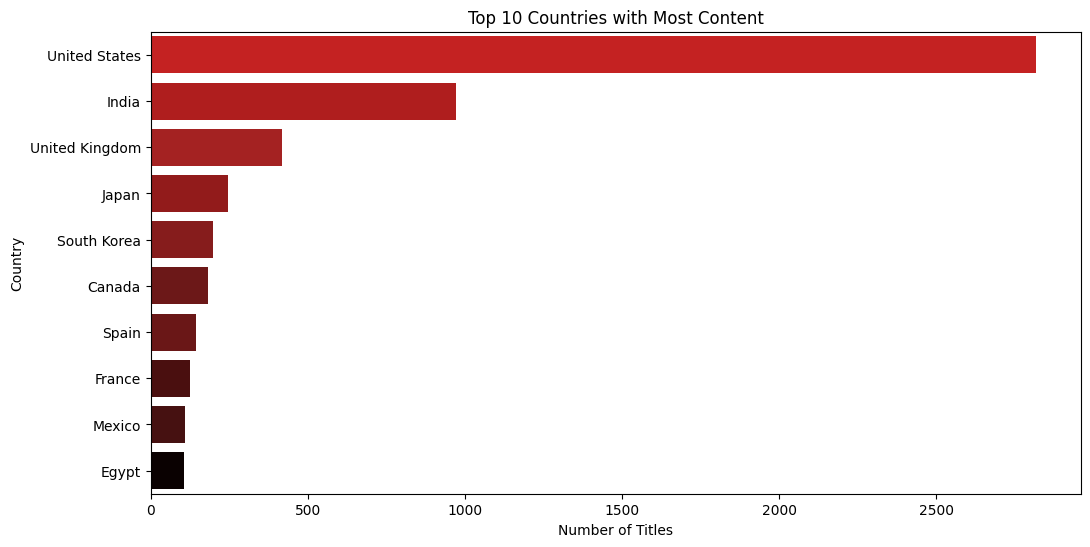

In [ ]:
plt.figure(figsize=(12, 6))
top_countries = netflix['country'].value_counts().head(10)
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

###Distribution of content release years

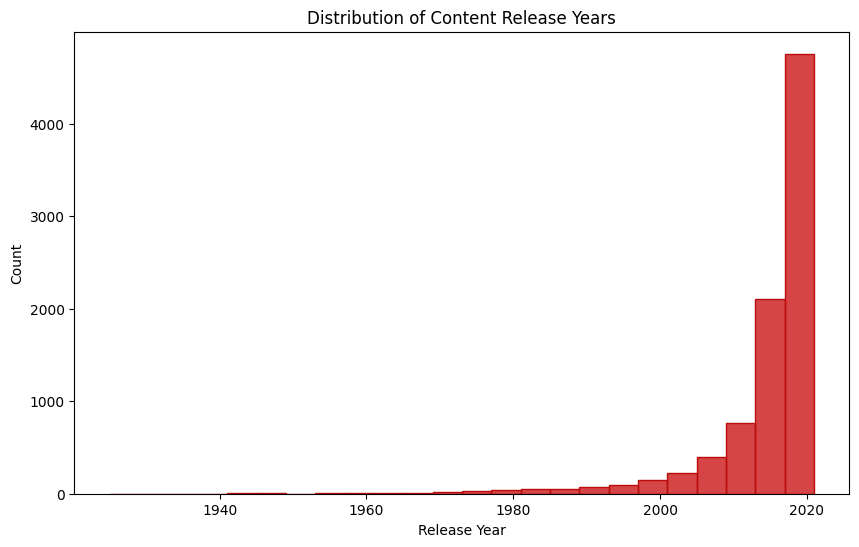

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix['release_year'], binwidth=4, color='#c70606', edgecolor='#ba0c0c' )
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

###Distribution of content types over the years

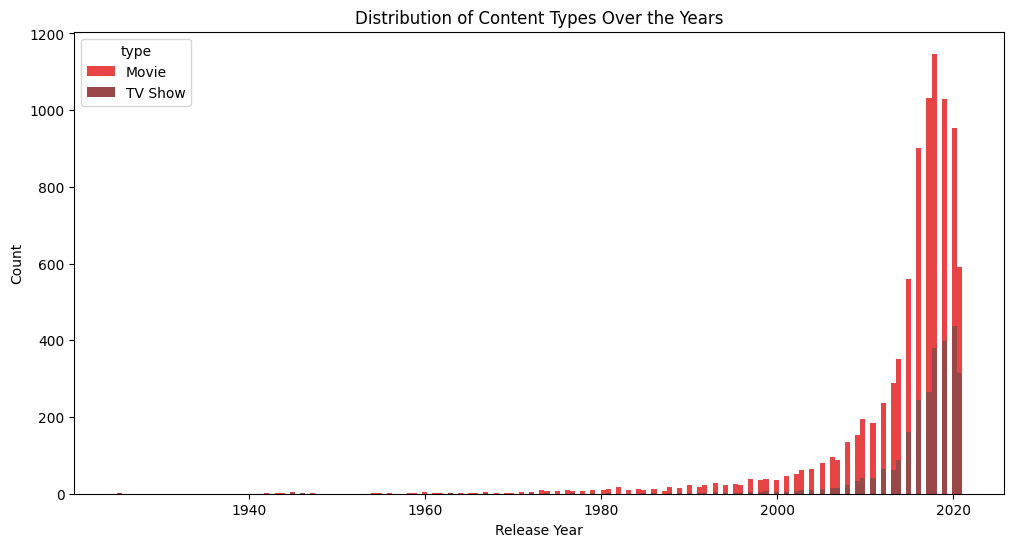

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix, x='release_year', hue='type', multiple="stack", palette={"Movie": '#df0707', "TV Show": '#780909'}, edgecolor=None)
plt.title('Distribution of Content Types Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

###Relationship between the rating and the year of release

In [ ]:
colors_boxplot = ['#df0707', '#c70606','#ba0c0c', '#a60707', '#980a0a', '#7a0a0a', '#780909']

<ipython-input-134-d4eceae77dd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-134-d4eceae77dd9>:2: UserWarning: 
The palette list has fewer values (7) than needed (17) and will cycle, which may produce an uninterpretable plot.


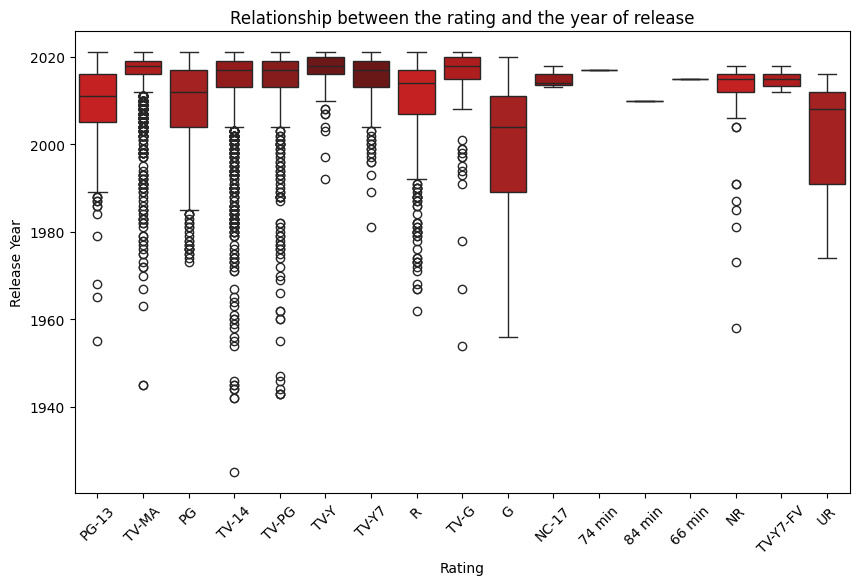

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=netflix, hue=None, palette=colors_boxplot)
plt.title('Relationship between the rating and the year of release')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()